In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Set seed for reproducibility
np.random.seed(42)

In [117]:
# Define the number of samples
num_samples = 10000

In [118]:
# Generate synthetic data
df = pd.DataFrame({
    'patient_id': range(1, num_samples + 1),  # Unique identifier for patients
    'fever': np.random.choice([0, 1], size=num_samples, p=[0.4, 0.6]),
    'cough': np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5]),
    'shortness_of_breath': np.random.choice([0, 1], size=num_samples, p=[0.3, 0.7]),
    'chest_pain': np.random.choice([0, 1], size=num_samples, p=[0.6, 0.4]),
    'headache': np.random.choice([0, 1], size=num_samples, p=[0.5, 0.5]),
    'age': np.random.randint(18, 90, size=num_samples),
    'gender': np.random.choice(['Male', 'Female'], size=num_samples),
    'smoking_history': np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3]),
    'family_history_of_disease': np.random.choice([0, 1], size=num_samples, p=[0.6, 0.4]),
    'diabetes': np.random.choice([0, 1], size=num_samples, p=[0.8, 0.2]),
    'hypertension': np.random.choice([0, 1], size=num_samples, p=[0.7, 0.3]),
    'heart_disease': np.random.choice([0, 1], size=num_samples, p=[0.85, 0.15]),
    'disease': np.random.choice(['Flu', 'COVID-19', 'Pneumonia', 'None'], size=num_samples,
                                p=[0.3, 0.2, 0.2, 0.3])  # Target labels
})


In [119]:
df.head()

,patient_id,fever,cough,shortness_of_breath,chest_pain,headache,age,gender,smoking_history,family_history_of_disease,diabetes,hypertension,heart_disease,disease
0,1,0,0,1,1,0,26,Female,0,0,0,0,0,Flu
1,2,1,0,0,0,0,87,Male,0,1,0,1,0,None
2,3,1,0,1,1,0,41,Female,0,1,0,1,0,None
3,4,1,1,1,0,0,82,Female,0,0,0,1,0,Pneumonia
4,5,0,0,1,0,0,34,Female,0,0,1,0,0,None


In [120]:
df.describe()

,patient_id,fever,cough,shortness_of_breath,chest_pain,headache,age,smoking_history,family_history_of_disease,diabetes,hypertension,heart_disease
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.594200,0.506400,0.702900,0.400000,0.493700,53.3690,0.303600,0.402600,0.197900,0.290500,0.150100
std,2886.89568,0.491071,0.499984,0.457004,0.489922,0.499985,20.7593,0.459835,0.490446,0.398436,0.454016,0.357187
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,18.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,0.000000,0.000000,0.000000,0.000000,0.000000,35.0000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,1.000000,1.000000,1.000000,0.000000,0.000000,53.0000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7500.25000,1.000000,1.000000,1.000000,1.000000,1.000000,71.0000,1.000000,1.000000,0.000000,1.000000,0.000000
max,10000.00000,1.000000,1.000000,1.000000,1.000000,1.000000,89.0000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   patient_id                 10000 non-null  int64 
 1   fever                      10000 non-null  int64 
 2   cough                      10000 non-null  int64 
 3   shortness_of_breath        10000 non-null  int64 
 4   chest_pain                 10000 non-null  int64 
 5   headache                   10000 non-null  int64 
 6   age                        10000 non-null  int64 
 7   gender                     10000 non-null  object
 8   smoking_history            10000 non-null  int64 
 9   family_history_of_disease  10000 non-null  int64 
 10  diabetes                   10000 non-null  int64 
 11  hypertension               10000 non-null  int64 
 12  heart_disease              10000 non-null  int64 
 13  disease                    10000 non-null  object
dtypes: int6

In [122]:
df.shape

(10000, 14)

In [123]:
df.columns

Index(['patient_id', 'fever', 'cough', 'shortness_of_breath', 'chest_pain',
       'headache', 'age', 'gender', 'smoking_history',
       'family_history_of_disease', 'diabetes', 'hypertension',
       'heart_disease', 'disease'],
      dtype='object')

In [124]:

df.dtypes

,0
patient_id,int64
fever,int64
cough,int64
shortness_of_breath,int64
chest_pain,int64
headache,int64
age,int64
gender,object
smoking_history,int64
family_history_of_disease,int64


In [125]:
df.isnull().sum()

,0
patient_id,0
fever,0
cough,0
shortness_of_breath,0
chest_pain,0
headache,0
age,0
gender,0
smoking_history,0
family_history_of_disease,0


In [126]:
df.duplicated().sum()

0

In [127]:
df.disease.value_counts()

,count
disease,
Flu,3066
None,2954
Pneumonia,2014
COVID-19,1966


In [128]:
#This command givs the minimum and maximum value of age column:

print("Patient's minimum age:",df['age'].min(),"\nPatient's maximum age:", df['age'].max())

Patient's minimum age: 18 
Patient's maximum age: 89


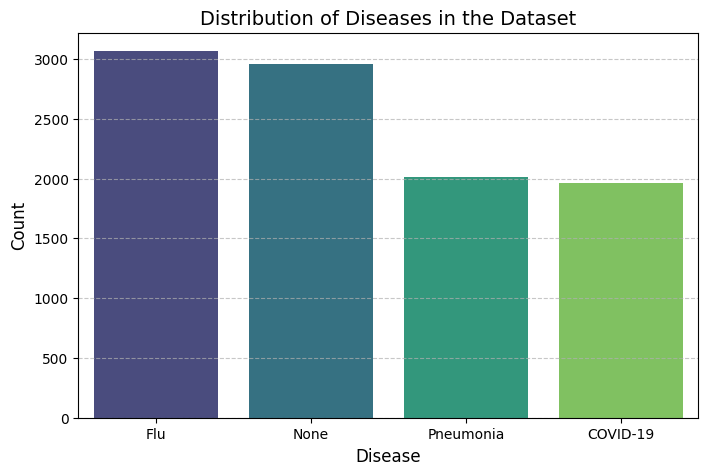

In [129]:
# Create a count plot for the 'disease' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='disease', palette='viridis')
plt.title("Distribution of Diseases in the Dataset", fontsize=14)
plt.xlabel("Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [130]:


#Import some libraries for label encoding, accurarcy and other:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [131]:
df.head()

,patient_id,fever,cough,shortness_of_breath,chest_pain,headache,age,gender,smoking_history,family_history_of_disease,diabetes,hypertension,heart_disease,disease
0,1,0,0,1,1,0,26,Female,0,0,0,0,0,Flu
1,2,1,0,0,0,0,87,Male,0,1,0,1,0,None
2,3,1,0,1,1,0,41,Female,0,1,0,1,0,None
3,4,1,1,1,0,0,82,Female,0,0,0,1,0,Pneumonia
4,5,0,0,1,0,0,34,Female,0,0,1,0,0,None


In [132]:
# Convert categorical features to numeric using Label Encoding
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['disease'] = LabelEncoder().fit_transform(df['disease'])

In [133]:
# Separate features and target
X = df.drop('disease', axis=1)  # Features
y = df['disease']               # Target variable

In [134]:
df.head()

,patient_id,fever,cough,shortness_of_breath,chest_pain,headache,age,gender,smoking_history,family_history_of_disease,diabetes,hypertension,heart_disease,disease
0,1,0,0,1,1,0,26,0,0,0,0,0,0,1
1,2,1,0,0,0,0,87,1,0,1,0,1,0,2
2,3,1,0,1,1,0,41,0,0,1,0,1,0,2
3,4,1,1,1,0,0,82,0,0,0,0,1,0,3
4,5,0,0,1,0,0,34,0,0,0,1,0,0,2


In [135]:
# Scale the feature set to standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
model = LogisticRegression(random_state=42, max_iter=200)


In [140]:
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200, random_state=42)

In [141]:
# Step 6: Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [142]:
# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       387
           1       0.32      0.62      0.42       618
           2       0.32      0.44      0.37       585
           3       0.00      0.00      0.00       410

    accuracy                           0.32      2000
   macro avg       0.16      0.26      0.20      2000
weighted avg       0.19      0.32      0.24      2000



In [143]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


Model Accuracy: 0.32
